# Homework 2-3 Part (a)
Prepared with Ceren Demirkol, Okan Güven, Sevgican Varol

In [7]:
require(data.table)
set.seed(123)

In [8]:
consumption=fread("C:/Users/ceren.orhan/Desktop/ETM 58D/HW2-3/GercekZamanliTuketim-01012016-19052020.csv")

#Format manipulation
setnames(consumption,names(consumption)[3],'value')
consumption[,date:=as.Date(Tarih,'%d.%m.%Y')]
consumption[,hour:=as.numeric(substr(Saat,1,2))]
consumption=consumption[,list(date,hour,value)]
consumption[,value:=gsub(".", "",value, fixed = TRUE)]
consumption[,value:=as.numeric(gsub(",", ".",value, fixed = TRUE))]

head(consumption)

date,hour,value
2016-01-01,0,26277.24
2016-01-01,1,24991.82
2016-01-01,2,23532.61
2016-01-01,3,22464.78
2016-01-01,4,22002.91
2016-01-01,5,21957.08


Data has shifted to create 1 wee kand 2 days of lag. Then NA rows removed

In [9]:
consumption[,lag_168:=shift(value,168)]
consumption[,lag_48:=shift(value,48)]

full_data=consumption[complete.cases(consumption)]
head(full_data)

date,hour,value,lag_168,lag_48
2016-01-08,0,28602.02,26277.24,29189.27
2016-01-08,1,27112.37,24991.82,27614.02
2016-01-08,2,25975.34,23532.61,26578.97
2016-01-08,3,25315.55,22464.78,25719.19
2016-01-08,4,25128.15,22002.91,25864.63
2016-01-08,5,25356.22,21957.08,25918.59


Absolute percentage error valuesa re calculated.

In [10]:
full_data[,ape_168:=abs(full_data$value-full_data$lag_168)/full_data$value*100] #absolute percentage error
full_data[,ape_48:=abs(full_data$value-full_data$lag_48)/full_data$value*100]
tail(full_data)

date,hour,value,lag_168,lag_48,ape_168,ape_48
2020-05-19,18,30433.07,31661.53,30360.19,4.036596,0.2394763
2020-05-19,19,31670.85,32431.97,31802.96,2.403219,0.4171344
2020-05-19,20,31370.75,31893.32,31481.96,1.665787,0.3545022
2020-05-19,21,31577.82,32262.92,31349.23,2.169561,0.7238942
2020-05-19,22,31040.66,31651.02,30657.57,1.966324,1.2341555
2020-05-19,23,30283.87,30641.29,29582.26,1.180232,2.3167779


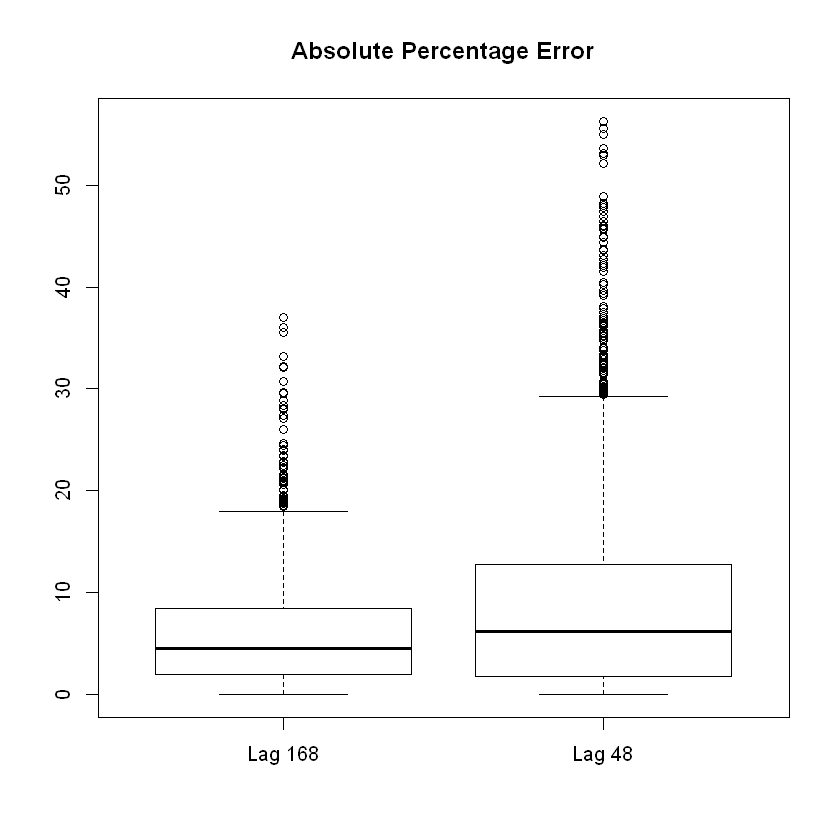

In [15]:
test=full_data[date >= '2020-03-01']

boxplot(test$ape_168,test$ape_48,names=c("Lag 168","Lag 48"))
title("Absolute Percentage Error")

In [17]:
summary(full_data[,6:7])

quantile_lag_168=quantile(test$ape_168, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_lag_48=quantile(test$ape_48, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
q_all=cbind(quantile_lag_168,quantile_lag_48)
q_all

    ape_168             ape_48        
 Min.   : 0.00006   Min.   : 0.00018  
 1st Qu.: 1.17450   1st Qu.: 1.70450  
 Median : 2.70960   Median : 5.36646  
 Mean   : 4.93208   Mean   : 7.97246  
 3rd Qu.: 5.29220   3rd Qu.:10.56880  
 Max.   :87.97862   Max.   :76.31046  

,quantile_lag_168,quantile_lag_48
10%,0.7727876,0.7104752
25%,2.0133265,1.8206243
50%,4.5708979,6.1576726
75%,8.4988936,12.7994874
90%,12.6391592,24.9016425


# Comments

From the boxplot we can say that predicting consumptions from last week instead of 2 days, give better result since box dimentison of Lag 168 is smaller. That means it has smaller standard deviation and less median error.

When we comment on summary, again we see that predicting consumption with last week's data is more accurate than other. Although, there are still too many outliers which might be reasonable. Religional holidays or special days like christmast will increase the electricity consumption and we can not easliy predict consumpiton by looking last week's data.